In [1]:
import pandas as pd


In [5]:
''' Bulid a dataframe in pandas'''
#import pandas as pd

def test_run():
    #dates = pd.date_range('2010-01-22', '2010-01-26')
    start_date='2010-01-22'
    end_date='2010-01-26'
    dates=pd.date_range(start_date,end_date)
    print dates
    #df1=pd.DataFrame(index=dates)



if __name__ == "__main__":
    test_run()

DatetimeIndex(['2010-01-22', '2010-01-23', '2010-01-24', '2010-01-25',
               '2010-01-26'],
              dtype='datetime64[ns]', freq='D')


In [17]:
from IPython.display import display
#join tempory dataframe and spy data SLICING
import pandas as pd
def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-22', '2010-01-26')
    df1=pd.DataFrame(index=dates)
    #df1.pd.DataFrame(index = dates)
    #dfSPY = pd.read_csv("data/SPY.csv")
    dfSPY = pd.read_csv("data/SPY.csv", index_col="Date",parse_dates=True,usecols=['Date','Adj Close'],na_values=['nan'])
    df1 = df1.join(dfSPY)
    
    
    
    #drop na values
    df1 = df1.dropna()
    display(df1)
    
if __name__ == "__main__":
    test_run()

,Adj Close
2010-01-22,104.34
2010-01-25,104.87
2010-01-26,104.43


In [29]:
#read more stock data
from IPython.display import display
import pandas as pd
def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-22', '2010-01-26')
    df1=pd.DataFrame(index=dates)

    dfSPY = pd.read_csv("data/SPY.csv", index_col="Date",parse_dates=True,usecols=['Date','Adj Close'],na_values=['nan'])
    
    dfSPY = dfSPY.rename(columns = {'Adj Close':'SPY'})
    
    df1 = df1.join(dfSPY, how = 'inner')
    
    #read in more stocks
    symbols = ['GOOG', 'IBM', 'GLD']
    for symbol in symbols:
        df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col="Date",parse_dates=True,usecols=['Date',
                                                                'Adj Close'],na_values=['nan'])
        
        
        df_temp = df_temp.rename(columns = {'Adj Close' : symbol})
        df1 = df1.join(df_temp)
        
    display(df1)
    
    
   
    
if __name__ == "__main__":
    test_run()

,SPY,GOOG,IBM,GLD
2010-01-26,104.43,542.42,119.85,107.56
2010-01-25,104.87,540.00,120.20,107.48
2010-01-22,104.34,550.01,119.61,107.17


In [37]:
"""Utility functions"""
import pandas as pd
import os
import pandas as pd

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "data/{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col="Date",parse_dates=True,usecols=['Date',
                                                                'Adj Close'],na_values=['nan'])
        
        
        df_temp = df_temp.rename(columns = {'Adj Close' : symbol})
        df = df.join(df_temp)
        df = df.dropna()

    return df


def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-22', '2010-01-26')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    
    print df


if __name__ == "__main__":
    test_run()

               SPY    GOOG     IBM     GLD
2010-01-22  104.34  550.01  119.61  107.17
2010-01-25  104.87  540.00  120.20  107.48
2010-01-26  104.43  542.42  119.85  107.56


,SPY,GOOG,IBM,GLD
2010-01-04,108.27,626.75,126.24,109.80
2010-01-05,108.56,623.99,124.71,109.70
2010-01-06,108.64,608.26,123.90,111.51
2010-01-07,109.10,594.10,123.47,110.82
2010-01-08,109.46,602.02,124.71,111.37
2010-01-11,109.61,601.11,123.41,112.85
2010-01-12,108.59,590.48,124.39,110.49
2010-01-13,109.51,587.09,124.12,111.54
2010-01-14,109.80,589.85,126.10,112.03
2010-01-15,108.57,580.00,125.60,110.86


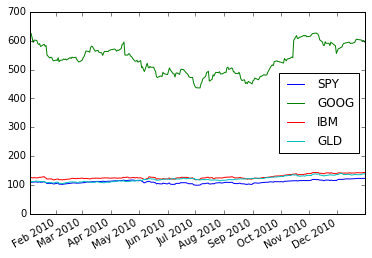

In [17]:
#plotting multiple stock data
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import os

'''
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "data/{}.csv".format(str(symbol)))
'''

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        #Read and join data for each symbol
        df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col="Date",parse_dates=True,usecols=['Date',
                                                                'Adj Close'],na_values=['nan'])
        
        
        df_temp = df_temp.rename(columns = {'Adj Close' : symbol})
        df = df.join(df_temp)
        df = df.dropna()

    return df


def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    
    display(df)
    
    plot_data(df)
    
    %matplotlib inline
    df.plot()
    plt.show()

"""def polt_data(df, tilte = "Stock Price"):
    %matplotlib inline
    ax = df.plot(title = title, fontsize = 2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()"""
    



if __name__ == "__main__":
    test_run()

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

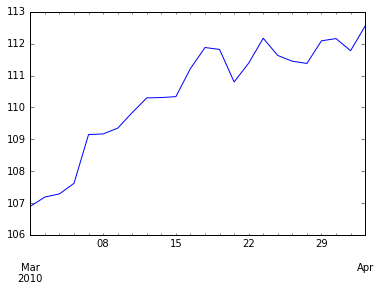

In [43]:
"""Slice and plot"""

import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # TODO: Your code here
    # Note: DO NOT modify anything else!
    plot_data(df.ix[start_index:end_index,columns],title="Selected Data")


def symbol_to_path(symbol, base_dir="data"):
    
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        #Read and join data for each symbol
        df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col="Date",parse_dates=True,usecols=['Date',
                                                                'Adj Close'],na_values=['nan'])
        
        
        df_temp = df_temp.rename(columns = {'Adj Close' : symbol})
        df = df.join(df_temp)
        df = df.dropna()

    return df


def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)

    # Slice and plot
    plot_selected(df, ['SPY', 'IBM'], '2010-03-01', '2010-04-01')
    


if __name__ == "__main__":
    test_run()


/Users/Binod/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<IPython.core.display.Javascript object>


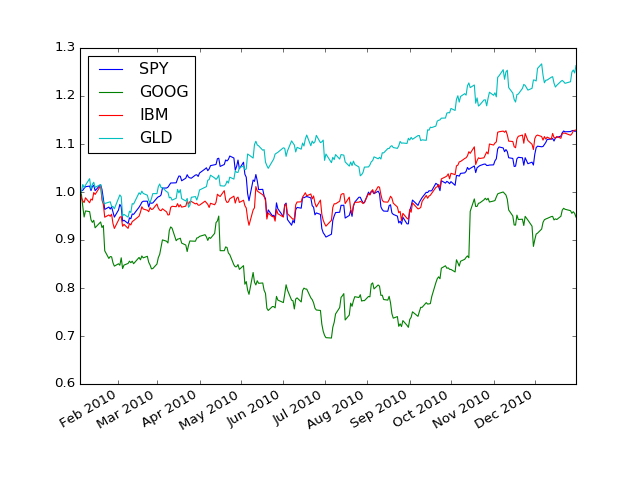

In [1]:
#normilize
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib notebook
import os


def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "data/{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        #Read and join data for each symbol
        df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col="Date",parse_dates=True,usecols=['Date',
                                                                'Adj Close'],na_values=['nan'])
        
        
        df_temp = df_temp.rename(columns = {'Adj Close' : symbol})
        df = df.join(df_temp)
        df = df.dropna()

    return df

def normilize_data(df):
    return df/df.ix[0,:]


def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    df = normilize_data(df)
    
    #display(df)
    
    #plot_data(df)
    
    
    df.plot()
    plt.show()
    
    normilize_data(df)

"""def polt_data(df, tilte = "Stock Price"):
    %matplotlib inline
    ax = df.plot(title = title, fontsize = 2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()"""
    



if __name__ == "__main__":
    test_run()